In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Load train and test datasets
train_data = pd.read_csv("/content/Train.csv")
test_data = pd.read_csv("/content/Test.csv")

In [2]:
# Handling missing values
train_data['Item_Weight'] = train_data['Item_Weight'].fillna(train_data['Item_Weight'].mean())
train_data['Outlet_Size'] = train_data['Outlet_Size'].fillna(train_data['Outlet_Size'].mode()[0])

test_data['Item_Weight'] = test_data['Item_Weight'].fillna(test_data['Item_Weight'].mean())
test_data['Outlet_Size'] = test_data['Outlet_Size'].fillna(test_data['Outlet_Size'].mode()[0])

# Convert categorical variables to numerical using one-hot encoding
train_data = pd.get_dummies(train_data, columns=['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'], drop_first=True)


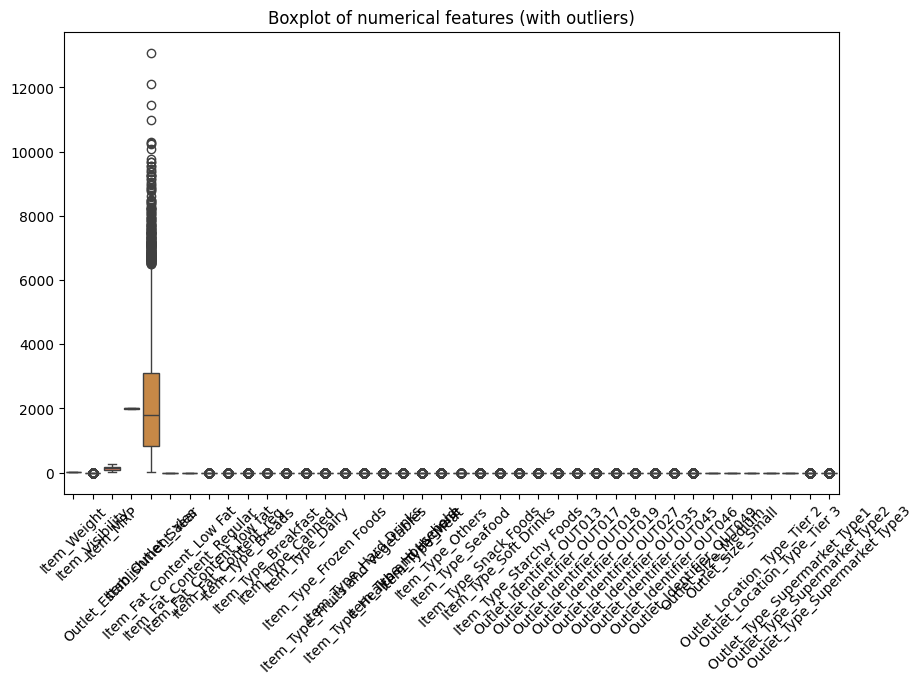

In [3]:
# Exploratory Data Analysis (EDA) - Outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_data.drop(columns=['Item_Identifier']))
plt.title("Boxplot of numerical features (with outliers)")
plt.xticks(rotation=45)
plt.show()


In [4]:

# Exploratory Data Analysis (EDA) - Graphs
# Pairplot for numerical features
sns.pairplot(train_data.drop(columns=['Item_Identifier']))
plt.title("Pairplot of numerical features")
plt.show()


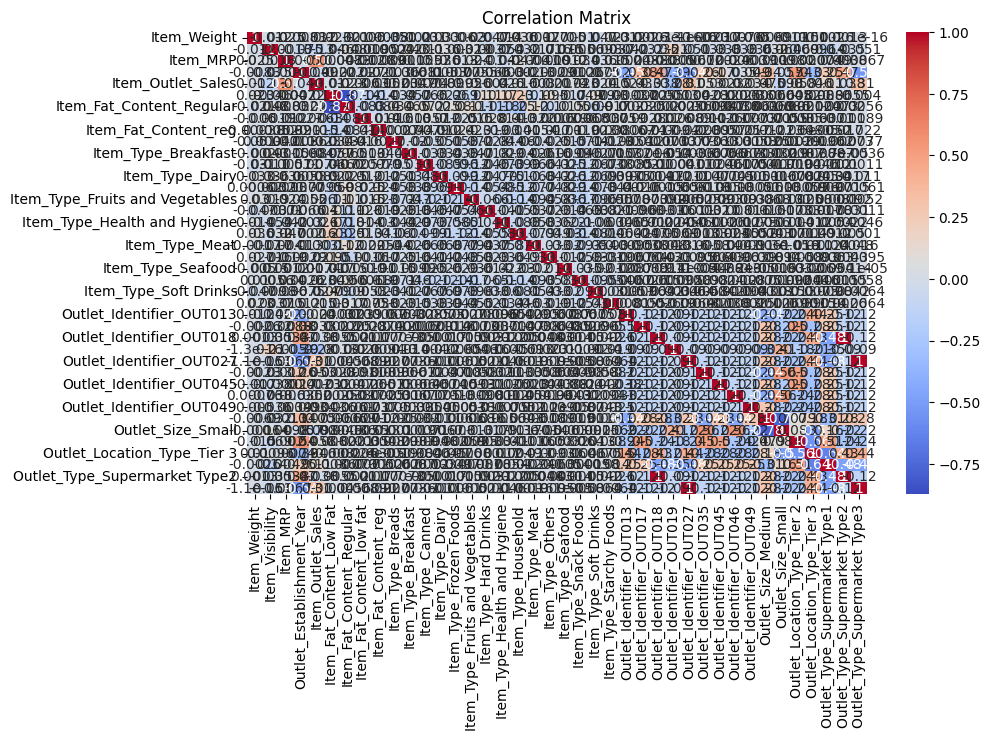

In [5]:
numeric_columns = train_data.select_dtypes(include=[np.number]).columns.tolist()
correlation_matrix = train_data[numeric_columns].corr()
# Plot correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


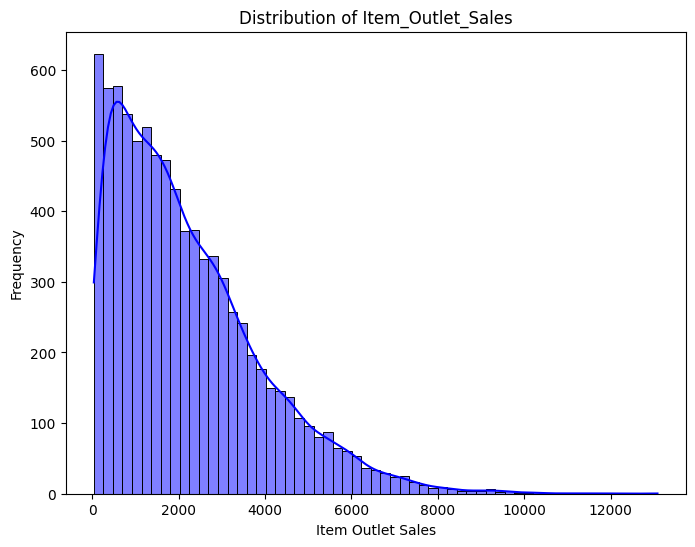

In [6]:
# Distribution of target variable
plt.figure(figsize=(8, 6))
sns.histplot(train_data['Item_Outlet_Sales'], kde=True, color='blue')
plt.title("Distribution of Item_Outlet_Sales")
plt.xlabel("Item Outlet Sales")
plt.ylabel("Frequency")
plt.show()

In [7]:

X_train = train_data.drop(columns=['Item_Outlet_Sales', 'Item_Identifier'])
y_train = train_data['Item_Outlet_Sales']
X_test = test_data.drop(columns=['Item_Identifier'])

#  Random Forest  model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)
rf_predictions = rf_regressor.predict(X_test)
print("Random Forest Predictions:")
print(rf_predictions)

#updated train dataset
print("\nUpdated Train dataset info:")
print(train_data.info())

# updated test dataset
print("\nUpdated Test dataset info:")
print(test_data.info())

# Evaluate the Random Forest model
train_rf_predictions = rf_regressor.predict(X_train)
train_rf_rmse = np.sqrt(mean_squared_error(y_train, train_rf_predictions))
print("\nRandom Forest Root Mean Squared Error (RMSE) on training data:", train_rf_rmse)

Random Forest Predictions:
[1730.434174 1347.54591   563.439908 ... 1755.088748 4936.30778
 1558.07187 ]

Updated Train dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Identifier                  8523 non-null   object 
 1   Item_Weight                      8523 non-null   float64
 2   Item_Visibility                  8523 non-null   float64
 3   Item_MRP                         8523 non-null   float64
 4   Outlet_Establishment_Year        8523 non-null   int64  
 5   Item_Outlet_Sales                8523 non-null   float64
 6   Item_Fat_Content_Low Fat         8523 non-null   uint8  
 7   Item_Fat_Content_Regular         8523 non-null   uint8  
 8   Item_Fat_Content_low fat         8523 non-null   uint8  
 9   Item_Fat_Content_reg             8523 non-null   uint8  
 10  Item_Type_

In [8]:
#XGBoost Regressor model
xgb_regressor = XGBRegressor()
xgb_param_grid = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7]
}
xgb_grid_search = GridSearchCV(xgb_regressor, param_grid=xgb_param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
xgb_grid_search.fit(X_train, y_train)
best_xgb_model = xgb_grid_search.best_estimator_
best_xgb_model.fit(X_train, y_train)
# Make predictions using the best XGBoost model
xgb_predictions = best_xgb_model.predict(X_test)
print("\nXGBoost Predictions:")
print(xgb_predictions)
# Evaluate the XGBoost model
train_xgb_predictions = best_xgb_model.predict(X_train)
train_xgb_rmse = np.sqrt(mean_squared_error(y_train, train_xgb_predictions))
print("\nXGBoost Root Mean Squared Error (RMSE) on training data:", train_xgb_rmse)

Fitting 3 folds for each of 27 candidates, totalling 81 fits

XGBoost Predictions:
[1705.627   1442.1127   723.32495 ... 1864.7898  3625.3955  1347.0042 ]

XGBoost Root Mean Squared Error (RMSE) on training data: 1036.9872941324045


In [ ]:
# Gradient Boosting Regressor model
gbr_regressor = GradientBoostingRegressor()
gbr_param_grid = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
gbr_grid_search = GridSearchCV(gbr_regressor, param_grid=gbr_param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
gbr_grid_search.fit(X_train, y_train)
best_gbr_model = gbr_grid_search.best_estimator_
best_gbr_model.fit(X_train, y_train)
# Make predictions using the best Gradient Boosting model
gbr_predictions = best_gbr_model.predict(X_test)
print("\nGradient Boosting Regressor Predictions:")
print(gbr_predictions)
# Evaluate the Gradient Boosting model
train_gbr_predictions = best_gbr_model.predict(X_train)
train_gbr_rmse = np.sqrt(mean_squared_error(y_train, train_gbr_predictions))
print("\nGradient Boosting Regressor Root Mean Squared Error (RMSE) on training data:", train_gbr_rmse)

Fitting 3 folds for each of 243 candidates, totalling 729 fits
